In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# 获取当前文件所在目录的父目录
import os
import sys

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

if parent_dir not in sys.path:
    sys.path.append(parent_dir)


from Dtool import fill_missing_values, plot_factors_by_pattern, plot_comparison_multiple, reverse_column, plot_feature_importance,plot_predictions


In [3]:
# 尝试多个可能的文件路径
file_paths = [
    os.path.expanduser("~/Desktop/X-BASE/Wti模型3.0/eta/Brent原油价格_合并数据.xlsx"),
    os.path.expanduser("~/Desktop/弘则研究/Horizon-Insights/X-base/Wti模型3.0/eta/Brent原油价格_合并数据.xlsx"),
    os.path.expanduser("~/Downloads/hongze/Wti模型3.0/eta/Brent原油价格_合并数据.xlsx")
]

file_path = None
for path in file_paths:
    if os.path.isfile(path):  # 确保是文件而不是目录
        file_path = path
        break

if file_path is None:
    raise FileNotFoundError("未找到数据文件")

try:
    sheet1 = pd.ExcelFile(file_path).parse('Sheet1')
    sheet1['Date'] = pd.to_datetime(sheet1['Date'], errors='coerce')
    sheet1 = sheet1.drop(columns=['布伦特原油期货价格'])
    sheet1 = sheet1.dropna()
    sheet1 = sheet1.sort_values('Date', ascending=True)
    brent_forecast = sheet1.copy()
except Exception as e:
    raise Exception(f"读取文件时出错: {str(e)}")

brent_forecast.head(1)


,Date,Brent原油期货价格预测
20,2025-10-29,76.13


In [4]:
# 尝试多个可能的文件路径
file_paths1 = [
    os.path.expanduser("~/Desktop/X-BASE/宏观经济/eta/USDCNY即期汇率_合并数据.xlsx"),
    os.path.expanduser("~/Desktop/弘则研究/Horizon-Insights/X-base/宏观经济/eta/USDCNY即期汇率_合并数据.xlsx"),
    os.path.expanduser("~/Downloads/hongze/宏观经济/eta/USDCNY即期汇率_合并数据.xlsx")
]

file_path1 = None
for path in file_paths1:
    if os.path.isfile(path):  # 确保是文件而不是目录
        file_path1 = path
        break

if file_path1 is None:
    raise FileNotFoundError("未找到数据文件")

try:
    sheet2 = pd.ExcelFile(file_path1).parse('Sheet1')
    sheet2['Date'] = pd.to_datetime(sheet2['Date'], errors='coerce')
    sheet2 = sheet2.drop(columns=['真实值'])
    sheet2 = sheet2.dropna()
    sheet2 = sheet2.sort_values('Date', ascending=True)
    rmb_usd_forecast = sheet2.copy()
except Exception as e:
    raise Exception(f"读取文件时出错: {str(e)}")
rmb_usd_forecast =  rmb_usd_forecast.rename(columns={'预测值':'USDCNH:即期汇率_预测'})
rmb_usd_forecast.head(1)

,Date,USDCNH:即期汇率_预测
19,2025-10-29,7.1064


In [5]:
gasoline_forecast = pd.ExcelFile('eta/汽油裂解差(多因子)_合并数据.xlsx').parse('Sheet1')
gasoline_forecast['Date'] = pd.to_datetime(gasoline_forecast['Date'], errors='coerce')
gasoline_forecast = gasoline_forecast.sort_values('Date', ascending=True)
gasoline_forecast = gasoline_forecast.drop(columns=['真实值'])
gasoline_forecast = gasoline_forecast.dropna()
gasoline_forecast = gasoline_forecast.rename(columns={'预测值':'山东汽油裂解差_预测'})
gasoline_forecast.head(1)

,Date,山东汽油裂解差_预测
19,2025-10-29,578.2


In [6]:
diesel_forecast = pd.ExcelFile('eta/山东柴油裂解差(多因子)_合并数据.xlsx').parse('Sheet1')
diesel_forecast['Date'] = pd.to_datetime(diesel_forecast['Date'], errors='coerce')
diesel_forecast = diesel_forecast.sort_values('Date', ascending=True)
diesel_forecast = diesel_forecast.drop(columns=['真实值'])
diesel_forecast = diesel_forecast.dropna()
diesel_forecast = diesel_forecast.rename(columns={'预测值':'山东柴油裂解差_预测'})
diesel_forecast.head(1)

,Date,山东柴油裂解差_预测
19,2025-10-29,346.8


In [7]:
kerosene_diesel_forecast = pd.ExcelFile('eta/新加坡航空煤油裂解价差_合并数据.xlsx').parse('Sheet1')
kerosene_diesel_forecast['Date'] = pd.to_datetime(kerosene_diesel_forecast['Date'], errors='coerce')
kerosene_diesel_forecast = kerosene_diesel_forecast.sort_values('Date', ascending=True)
kerosene_diesel_forecast = kerosene_diesel_forecast.drop(columns=['新加坡航空煤油裂解价差'])
kerosene_diesel_forecast = kerosene_diesel_forecast.dropna()
kerosene_diesel_forecast.tail(1)

,Date,新加坡航空煤油裂解价差_预测
0,2025-11-25,15.77


In [8]:
# 统一日期格式
brent_forecast['Date'] = pd.to_datetime(brent_forecast['Date'])
rmb_usd_forecast['Date'] = pd.to_datetime(rmb_usd_forecast['Date']) 
gasoline_forecast['Date'] = pd.to_datetime(gasoline_forecast['Date'])
diesel_forecast['Date'] = pd.to_datetime(diesel_forecast['Date'])
kerosene_diesel_forecast['Date'] = pd.to_datetime(kerosene_diesel_forecast['Date'])


# 合并所有预测数据,以日期为基准
merged_forecast = pd.merge(brent_forecast, rmb_usd_forecast, on='Date', how='inner')
merged_forecast = pd.merge(merged_forecast, gasoline_forecast, on='Date', how='inner')
merged_forecast = pd.merge(merged_forecast, diesel_forecast, on='Date', how='inner')
merged_forecast = pd.merge(merged_forecast, kerosene_diesel_forecast, on='Date', how='inner')

# 按日期排序
merged_forecast = merged_forecast.sort_values('Date')

# 显示合并后的数据
merged_forecast.tail(1)

,Date,Brent原油期货价格预测,USDCNH:即期汇率_预测,山东汽油裂解差_预测,山东柴油裂解差_预测,新加坡航空煤油裂解价差_预测
19,2025-11-25,78.78,7.1758,637.5,355.8,15.77


In [9]:
# 计算汽油价格预测
merged_forecast['汽油价格预测'] = merged_forecast['山东汽油裂解差_预测'] + merged_forecast['Brent原油期货价格预测'] * merged_forecast['USDCNH:即期汇率_预测'] * 7.33
merged_forecast['柴油价格预测'] = merged_forecast['山东柴油裂解差_预测'] + merged_forecast['Brent原油期货价格预测'] * merged_forecast['USDCNH:即期汇率_预测'] * 7.33
merged_forecast['航空煤油新加坡FOB价格_预测'] = merged_forecast['新加坡航空煤油裂解价差_预测'] + merged_forecast['Brent原油期货价格预测']

merged_forecast.tail(1)

,Date,Brent原油期货价格预测,USDCNH:即期汇率_预测,山东汽油裂解差_预测,山东柴油裂解差_预测,新加坡航空煤油裂解价差_预测,汽油价格预测,柴油价格预测,航空煤油新加坡FOB价格_预测
19,2025-11-25,78.78,7.1758,637.5,355.8,15.77,4781.218811,4499.518811,94.55


In [10]:
def solve_A_汽油(c, B):
    # 计算常数部分
    right_side = 2109.76 * 1.12 + c
    # 计算分母
    denominator = (1 - 0.12 * B) / (1 + B)
    # 计算 A 的值
    A = right_side / denominator
    return A

def solve_A_柴油(c, B):
    # 计算右侧常数部分
    right_side = 1411.2 * 1.12 + c
    # 计算分母
    denominator = (1 - 0.12 * B) / (1 + B)
    # 计算 A 的值
    A = right_side / denominator
    return A

In [11]:
# 计算 市价
merged_forecast['汽油价格预测_市价'] = merged_forecast['汽油价格预测'].apply(lambda x: solve_A_汽油(x, 0.13))
merged_forecast['柴油价格预测_市价'] = merged_forecast['柴油价格预测'].apply(lambda x: solve_A_柴油(x, 0.13))
merged_forecast.tail(1)

,Date,Brent原油期货价格预测,USDCNH:即期汇率_预测,山东汽油裂解差_预测,山东柴油裂解差_预测,新加坡航空煤油裂解价差_预测,汽油价格预测,柴油价格预测,航空煤油新加坡FOB价格_预测,汽油价格预测_市价,柴油价格预测_市价
19,2025-11-25,78.78,7.1758,637.5,355.8,15.77,4781.218811,4499.518811,94.55,8200.822341,6979.348818


In [12]:
# 读取历史数据
historical_data = pd.read_excel('data_input_auto/Brent-汽油-柴油-新加坡煤油.xlsx').rename(columns={'DataTime': 'Date'})
historical_data = historical_data[historical_data['Date'] >= '2023-01-01']
historical_data = historical_data.rename(columns={'ICE Europe Brent Crude M1':'布伦特原油现货价格'})
# 显示历史数据
historical_data.tail(1)

,Date,Brent原油期货连1合约价格/路透,山东92#汽油净价,山东0#柴油净价,航空煤油新加坡FOB价格,柴油：国六：0#：市场价：山东（日）,汽油：国六：92#：市场价：山东（日）
4577,2025-10-28,64.21,3766.4833,3879.827,NaN,6268.0,7036.0


In [13]:
# 将历史数据
historical_monthly = historical_data.copy()
historical_monthly['Date'] = pd.to_datetime(historical_monthly['Date'])
# 净价 到 市价
historical_monthly['汽油价格_市价'] = historical_monthly['山东92#汽油净价'].apply(lambda x: solve_A_汽油(x, 0.13))
historical_monthly['柴油价格_市价'] = historical_monthly['山东0#柴油净价'].apply(lambda x: solve_A_柴油(x, 0.13))
historical_monthly.tail(1)

,Date,Brent原油期货连1合约价格/路透,山东92#汽油净价,山东0#柴油净价,航空煤油新加坡FOB价格,柴油：国六：0#：市场价：山东（日）,汽油：国六：92#：市场价：山东（日）,汽油价格_市价,柴油价格_市价
4577,2025-10-28,64.21,3766.4833,3879.827,NaN,6268.0,7036.0,7035.999985,6268.00003


In [14]:
# 将 historical_monthly 的 Date 列转换为 datetime 类型
historical_monthly['Date'] = pd.to_datetime(historical_monthly['Date'])

# 将 merged_forecast 的 Date 列转换为 datetime 类型
merged_forecast['Date'] = pd.to_datetime(merged_forecast['Date'])

# 合并数据集并选择指定列
combined_data = pd.merge(
    merged_forecast[['Date', '汽油价格预测_市价', '柴油价格预测_市价', '航空煤油新加坡FOB价格_预测']],
    historical_monthly[['Date', '汽油价格_市价', '柴油价格_市价', '航空煤油新加坡FOB价格']],
    on='Date',
    how='outer'
)[['Date', '汽油价格_市价', '汽油价格预测_市价', '柴油价格_市价', '柴油价格预测_市价', 
   '航空煤油新加坡FOB价格', '航空煤油新加坡FOB价格_预测']]

# 按日期降序排序
combined_data = combined_data.sort_values(by='Date', ascending=False)
combined_data_1 = combined_data.copy()
# 将日期格式转换为年/月/日格式  
combined_data_1['Date'] = combined_data_1['Date'].dt.strftime('%Y/%m/%d')
# 保存合并后的数据到 Excel 文件
combined_data_1.to_excel('eta/2024年成油品价格_日度数据_多因子.xlsx', index=False, float_format='%.0f')
# 显示合并后的数据的前几行
combined_data_1.head(2)

,Date,汽油价格_市价,汽油价格预测_市价,柴油价格_市价,柴油价格预测_市价,航空煤油新加坡FOB价格,航空煤油新加坡FOB价格_预测
776,2025/11/25,NaN,8200.822341,NaN,6979.348818,NaN,94.55
775,2025/11/24,NaN,8205.414887,NaN,6977.513083,NaN,94.68


In [15]:
combined_data_1_monthly = combined_data_1.copy()

# 将Date列转换为datetime格式
combined_data_1_monthly['Date'] = pd.to_datetime(combined_data_1_monthly['Date'])
combined_data_1_monthly = combined_data_1_monthly.sort_values(by='Date', ascending=True)
combined_data_1_monthly = combined_data_1_monthly.set_index('Date')
combined_data_1_monthly = combined_data_1_monthly.resample('ME').mean()
combined_data_1_monthly.reset_index(inplace=True)
combined_data_1_monthly = combined_data_1_monthly.sort_values('Date', ascending=False)
combined_data_1_monthly['Date'] = combined_data_1_monthly['Date'].dt.strftime('%Y/%m/%d')
combined_data_1_monthly.to_excel('eta/2024年成油品价格_月度数据_多因子.xlsx', index=False, float_format='%.0f')

# 显示合并后的数据的前几行
combined_data_1_monthly.head(2)

,Date,汽油价格_市价,汽油价格预测_市价,柴油价格_市价,柴油价格预测_市价,航空煤油新加坡FOB价格,航空煤油新加坡FOB价格_预测
34,2025/11/30,NaN,8195.764100,NaN,7043.637686,NaN,95.288824
33,2025/10/31,7265.333324,7930.865149,6307.666673,6873.389323,86.627778,93.743333


In [16]:
split_data = combined_data_1.copy()
# 创建汽油价格对比数据框
df_gasoline = split_data[['Date', '汽油价格_市价', '汽油价格预测_市价']].copy()
# 创建柴油价格对比数据框 
df_diesel = split_data[['Date', '柴油价格_市价', '柴油价格预测_市价']].copy()
# 创建煤油价格对比数据框
df_kerosene = split_data[['Date','航空煤油新加坡FOB价格', '航空煤油新加坡FOB价格_预测']].copy()

In [17]:
split_data_monthly = combined_data_1_monthly.copy()
# 创建汽油价格对比数据框
df_gasoline_monthly = split_data_monthly[['Date', '汽油价格_市价', '汽油价格预测_市价']].copy()
# 创建柴油价格对比数据框 
df_diesel_monthly = split_data_monthly[['Date', '柴油价格_市价', '柴油价格预测_市价']].copy()
# 创建煤油价格对比数据框
df_kerosene_monthly = split_data_monthly[['Date', '航空煤油新加坡FOB价格', '航空煤油新加坡FOB价格_预测']].copy()

In [18]:
historical_data

,Date,Brent原油期货连1合约价格/路透,山东92#汽油净价,山东0#柴油净价,航空煤油新加坡FOB价格,柴油：国六：0#：市场价：山东（日）,汽油：国六：92#：市场价：山东（日）
3821,2023-01-03,82.10,4338.8292,4668.2181,116.06,7173.0,7693.0
3822,2023-01-04,77.84,4344.0561,4665.6047,108.50,7170.0,7699.0
3823,2023-01-05,78.69,4294.4005,4620.3048,108.58,7118.0,7642.0
3824,2023-01-06,78.57,4297.0139,4607.2376,107.03,7103.0,7645.0
3825,2023-01-09,79.65,4671.6086,4717.0025,109.80,7229.0,8075.0
...,...,...,...,...,...,...,...
4573,2025-10-22,62.59,3854.4695,3862.4040,85.63,6248.0,7137.0
4574,2025-10-23,65.99,3864.0522,3906.8326,89.45,6299.0,7148.0
4575,2025-10-24,65.94,3892.8001,3958.2305,91.48,6358.0,7181.0
4576,2025-10-27,65.62,3803.0716,3878.9558,91.65,6267.0,7078.0


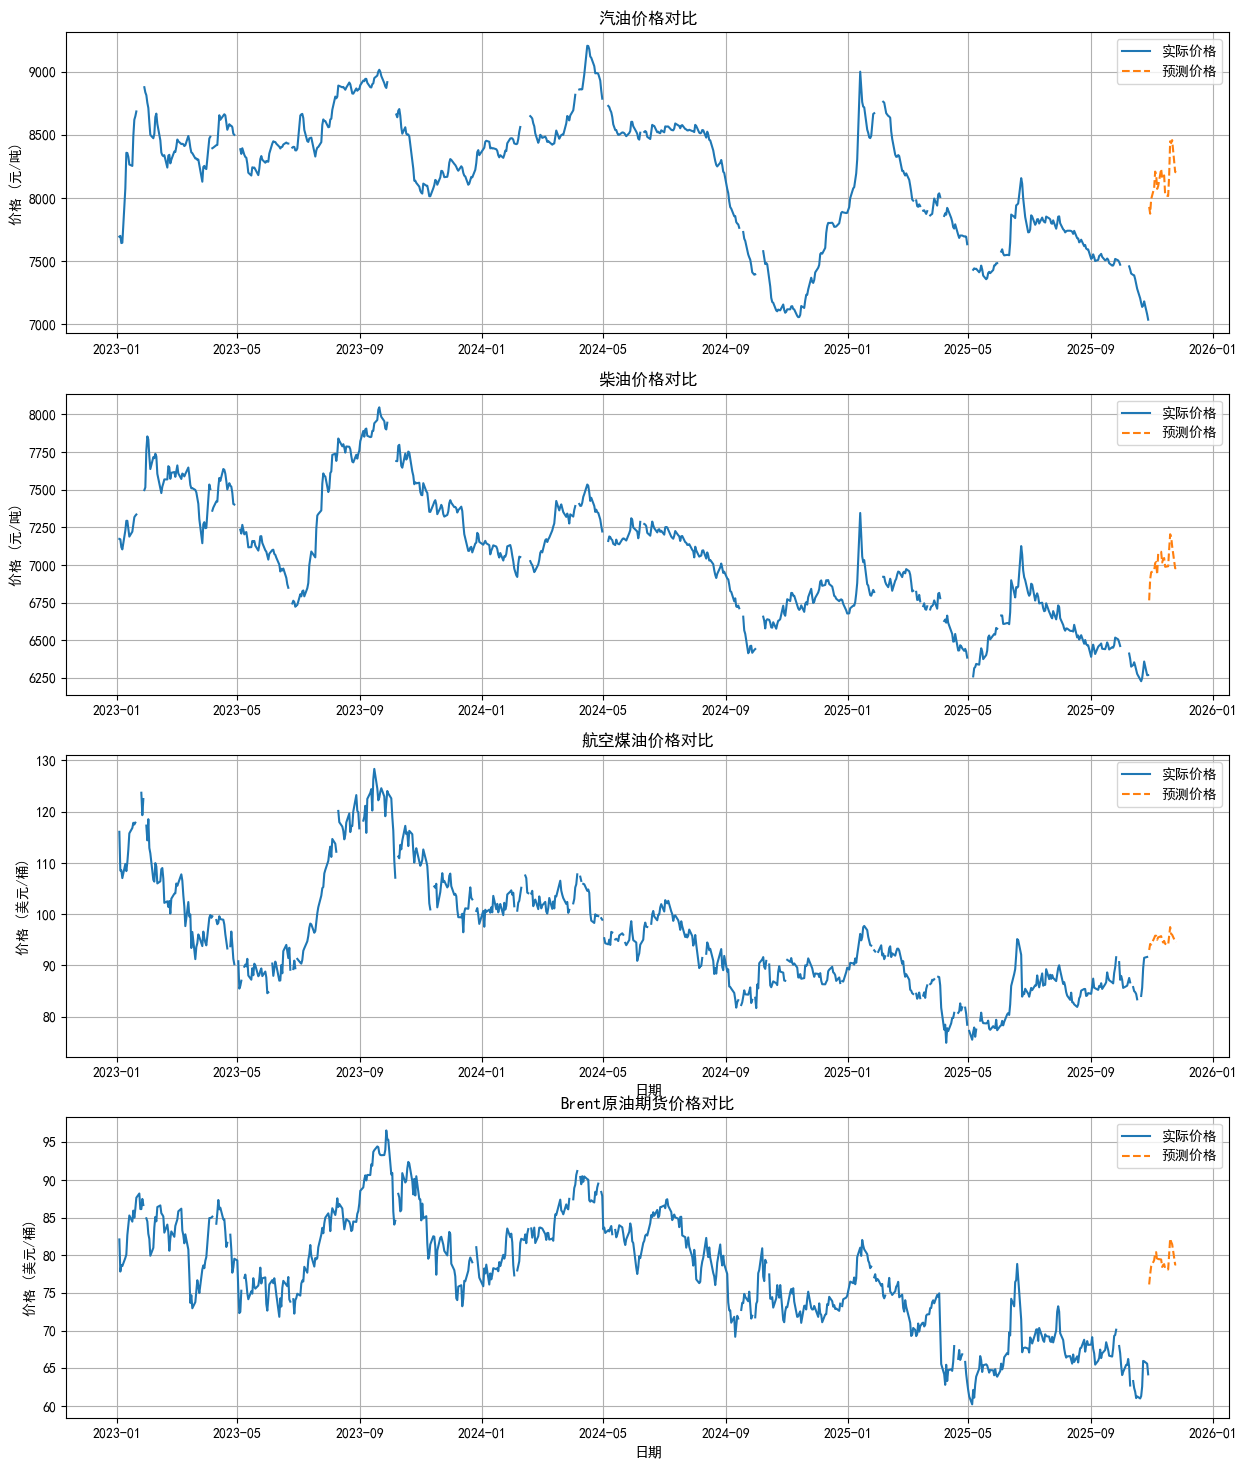

In [19]:
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 创建子图
fig, axes = plt.subplots(4, 1, figsize=(15, 18))

# 对数据按日期升序排序
df_gasoline_sorted = df_gasoline.sort_values('Date')
df_diesel_sorted = df_diesel.sort_values('Date')
df_kerosene_sorted = df_kerosene.sort_values('Date')

# 将日期转换为datetime格式以便更好地显示
df_gasoline_sorted['Date'] = pd.to_datetime(df_gasoline_sorted['Date'])
df_diesel_sorted['Date'] = pd.to_datetime(df_diesel_sorted['Date'])
df_kerosene_sorted['Date'] = pd.to_datetime(df_kerosene_sorted['Date'])


merged_forecast['Date'] = pd.to_datetime(merged_forecast['Date'])
historical_data['Date'] = pd.to_datetime(historical_data['Date'])

# 汽油价格对比图
axes[0].plot(df_gasoline_sorted['Date'], df_gasoline_sorted['汽油价格_市价'], 
             label='实际价格')
axes[0].plot(df_gasoline_sorted['Date'], df_gasoline_sorted['汽油价格预测_市价'], 
             label='预测价格', linestyle='--')
axes[0].set_title('汽油价格对比')
axes[0].set_ylabel('价格 (元/吨)')
axes[0].legend()
axes[0].grid(True)

# 柴油价格对比图
axes[1].plot(df_diesel_sorted['Date'], df_diesel_sorted['柴油价格_市价'], 
             label='实际价格')
axes[1].plot(df_diesel_sorted['Date'], df_diesel_sorted['柴油价格预测_市价'], 
             label='预测价格', linestyle='--')
axes[1].set_title('柴油价格对比')
axes[1].set_ylabel('价格 (元/吨)')
axes[1].legend()
axes[1].grid(True)

# 航煤价格对比图
axes[2].plot(df_kerosene_sorted['Date'], df_kerosene_sorted['航空煤油新加坡FOB价格'], 
             label='实际价格')
axes[2].plot(df_kerosene_sorted['Date'], df_kerosene_sorted['航空煤油新加坡FOB价格_预测'], 
             label='预测价格', linestyle='--')
axes[2].set_title('航空煤油价格对比')
axes[2].set_xlabel('日期')
axes[2].set_ylabel('价格 (美元/桶)')
axes[2].legend()
axes[2].grid(True)


# 航煤价格对比图
axes[3].plot(historical_data['Date'], historical_data['Brent原油期货连1合约价格/路透'], 
             label='实际价格')
axes[3].plot(merged_forecast['Date'], merged_forecast['Brent原油期货价格预测'], 
             label='预测价格', linestyle='--')
axes[3].set_title('Brent原油期货价格对比')
axes[3].set_xlabel('日期')
axes[3].set_ylabel('价格 (美元/桶)')
axes[3].legend()
axes[3].grid(True)
# 调整布局并显示
plt.show()


---

In [20]:
from Dcel import update_excel_data
# 使用示例
file_path = "eta/1.汽柴煤油_数据上传.xlsx"
sheet_name = "日度数据表"
identifier = "汽油价格预测市价(多因子)"

# 调用函数更新数据
success = update_excel_data(df_gasoline, file_path, sheet_name, identifier)

if success:
    print("数据已成功更新到Excel文件")
else:
    print("数据更新失败，请检查错误信息")

成功更新 日度数据表 中的数据
数据已成功更新到Excel文件


In [21]:
from Lcel import update_excel_data
file_path = "eta/1.汽柴煤油_数据上传.xlsx"
sheet_name = "详情页"
identifier = "汽油价格预测市价(多因子)"      # NEW: 新增日期标识符列的抬头
# 调用函数更新数据
success = update_excel_data(df_gasoline_monthly, file_path, sheet_name, identifier)

if success:
    print("数据已成功更新到Excel文件")
else:
    print("数据更新失败，请检查错误信息")

数据过滤完成: 保留 23 条数据（2024/01/31 之后），按时间倒序排列


已完成：插入/更新数据，并重新计算'方向/偏差率' (protected_date = 2025/10/31, cutoff_date = 2024/01/31)
数据已成功更新到Excel文件


In [22]:
count_prediction1 = df_gasoline.copy()
# 将实际值和预测值合并为一列
count_prediction1['预测叠加_汽油'] = count_prediction1['汽油价格_市价'].fillna(count_prediction1['汽油价格预测_市价'])
# 将日期列转换为datetime格式
count_prediction1['Date'] = pd.to_datetime(count_prediction1['Date'])
# 设置日期为索引
count_prediction1.set_index('Date', inplace=True)
# 获取每月最后一天的数据
count_monthly_data1 = count_prediction1.resample('ME').last()
# 重置索引并格式化日期
count_monthly_data1 = count_monthly_data1.reset_index()
count_monthly_data1['Date'] = count_monthly_data1['Date'].dt.strftime('%Y/%m/%d')
# 显示结果
print(count_monthly_data1[['Date', '预测叠加_汽油']].tail())

          Date      预测叠加_汽油
30  2025/07/31  7854.000028
31  2025/08/31  7592.000047
32  2025/09/30  7471.000051
33  2025/10/31  7989.462691
34  2025/11/30  8200.822341


---

In [23]:
from Dcel import update_excel_data
# 使用示例
file_path = "eta/1.汽柴煤油_数据上传.xlsx"
sheet_name = "日度数据表"
identifier = "柴油价格预测市价(多因子)"

# 调用函数更新数据
success = update_excel_data(df_diesel, file_path, sheet_name, identifier)

if success:
    print("数据已成功更新到Excel文件")
else:
    print("数据更新失败，请检查错误信息")

成功更新 日度数据表 中的数据
数据已成功更新到Excel文件


In [24]:
from Lcel import update_excel_data
file_path = "eta/1.汽柴煤油_数据上传.xlsx"
sheet_name = "详情页"
identifier = "柴油价格预测市价(多因子)"      # NEW: 新增日期标识符列的抬头
# 调用函数更新数据
success = update_excel_data(df_diesel_monthly, file_path, sheet_name, identifier)

if success:
    print("数据已成功更新到Excel文件")
else:
    print("数据更新失败，请检查错误信息")

数据过滤完成: 保留 23 条数据（2024/01/31 之后），按时间倒序排列


已完成：插入/更新数据，并重新计算'方向/偏差率' (protected_date = 2025/10/31, cutoff_date = 2024/01/31)
数据已成功更新到Excel文件


In [25]:
count_prediction = df_diesel.copy()
# 将实际值和预测值合并为一列
count_prediction['预测叠加_柴油'] = count_prediction['柴油价格_市价'].fillna(count_prediction['柴油价格预测_市价'])
# 将日期列转换为datetime格式
count_prediction['Date'] = pd.to_datetime(count_prediction['Date'])
# 设置日期为索引
count_prediction.set_index('Date', inplace=True)
# 获取每月最后一天的数据
count_monthly_data = count_prediction.resample('ME').last()
# 重置索引并格式化日期
count_monthly_data = count_monthly_data.reset_index()
count_monthly_data['Date'] = count_monthly_data['Date'].dt.strftime('%Y/%m/%d')
# 显示结果
print(count_monthly_data[['Date', '预测叠加_柴油']].tail())


          Date      预测叠加_柴油
30  2025/07/31  6720.000030
31  2025/08/31  6466.000045
32  2025/09/30  6460.999990
33  2025/10/31  6950.850810
34  2025/11/30  6979.348818


---

In [26]:
from Dcel import update_excel_data
# 使用示例
file_path = "eta/1.汽柴煤油_数据上传.xlsx"
sheet_name = "日度数据表"
identifier = "航空煤油新加坡FOB价格"

# 调用函数更新数据
success = update_excel_data(df_kerosene, file_path, sheet_name, identifier)

if success:
    print("数据已成功更新到Excel文件")
else:
    print("数据更新失败，请检查错误信息")

成功更新 日度数据表 中的数据
数据已成功更新到Excel文件


In [27]:
from Lcel import update_excel_data
file_path = "eta/1.汽柴煤油_数据上传.xlsx"
sheet_name = "详情页"
identifier = "航空煤油新加坡FOB价格"     # NEW: 新增日期标识符列的抬头
# 调用函数更新数据
success = update_excel_data(df_kerosene_monthly, file_path, sheet_name, identifier)

if success:
    print("数据已成功更新到Excel文件")
else:
    print("数据更新失败，请检查错误信息")

数据过滤完成: 保留 23 条数据（2024/01/31 之后），按时间倒序排列


已完成：插入/更新数据，并重新计算'方向/偏差率' (protected_date = 2025/10/31, cutoff_date = 2024/01/31)
数据已成功更新到Excel文件
